Linear Regression Equation: y = -3.5573x + 3.9167


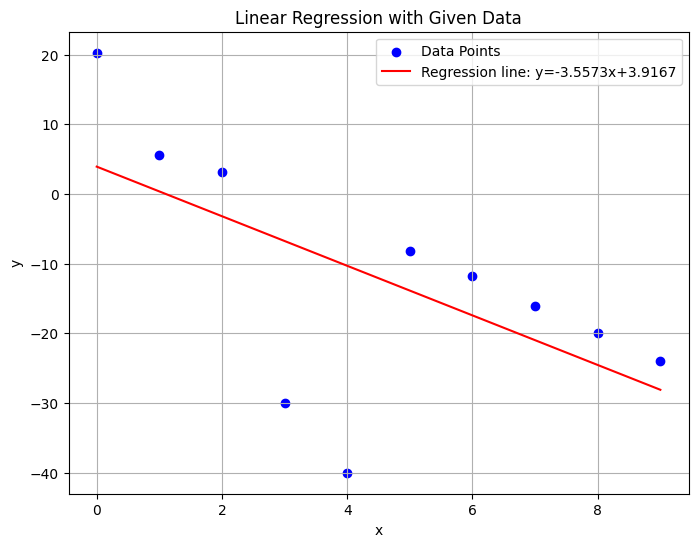

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data from Table 1
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: y = {slope:.4f}x + {intercept:.4f}")

# Plot data and regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, y_pred, color="red", label=f"Regression line: y={slope:.4f}x+{intercept:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Given Data")
plt.legend()
plt.grid(True)
plt.show()


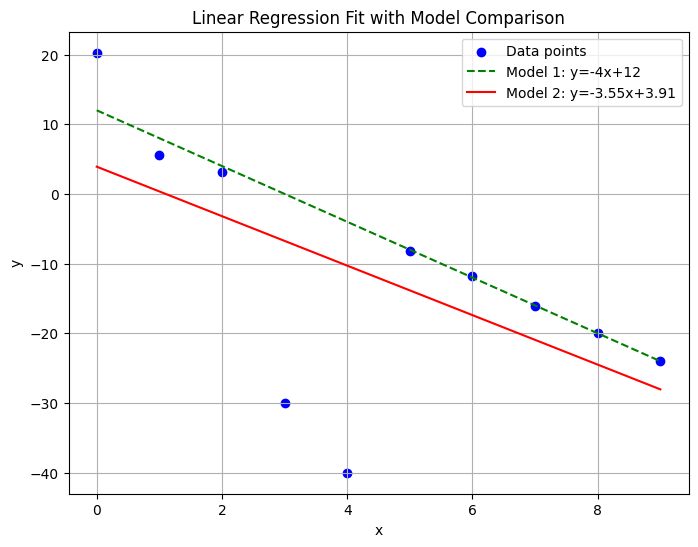

Loss values:
β=1: Model 1 loss=0.4354, Model 2 loss=0.9728
β=1e-06: Model 1 loss=1.0000, Model 2 loss=1.0000
β=1000.0: Model 1 loss=0.0002, Model 2 loss=0.0002


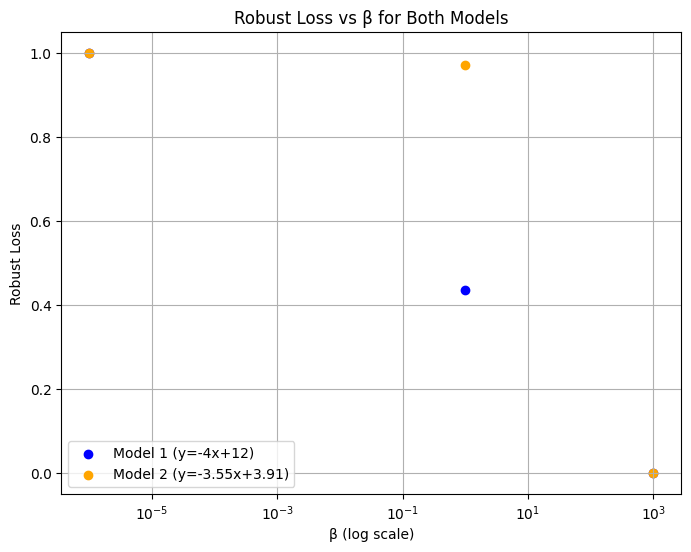

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data from Table 1
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define the two models
def model1(x): return -4*x + 12
def model2(x): return -3.55*x + 3.91

y_pred1 = model1(x)
y_pred2 = model2(x)

# ---------- Figure 1.2: Regression Fit with Models ----------
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred1, "g--", label="Model 1: y=-4x+12")
plt.plot(x, y_pred2, "r-", label="Model 2: y=-3.55x+3.91")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit with Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


# ---------- Robust Loss Function ----------
def robust_loss(y_true, y_pred, beta):
    errors = (y_true - y_pred)**2
    return np.mean(errors / (errors + beta**2))

betas = [1, 1e-6, 1e3]
losses_model1 = [robust_loss(y, y_pred1, b) for b in betas]
losses_model2 = [robust_loss(y, y_pred2, b) for b in betas]

print("Loss values:")
for b, l1, l2 in zip(betas, losses_model1, losses_model2):
    print(f"β={b}: Model 1 loss={l1:.4f}, Model 2 loss={l2:.4f}")


# ---------- Figure 1.3: Robust Loss vs β ----------
plt.figure(figsize=(8,6))
plt.scatter(betas, losses_model1, color="blue", label="Model 1 (y=-4x+12)")
plt.scatter(betas, losses_model2, color="orange", label="Model 2 (y=-3.55x+3.91)")
plt.xscale("log")
plt.xlabel("β (log scale)")
plt.ylabel("Robust Loss")
plt.title("Robust Loss vs β for Both Models")
plt.legend()
plt.grid(True, which="both")
plt.show()


    True y  Prediction y_hat       MSE       BCE
0        1             0.005  0.990025  5.298317
1        1             0.010  0.980100  4.605170
2        1             0.050  0.902500  2.995732
3        1             0.100  0.810000  2.302585
4        1             0.200  0.640000  1.609438
5        1             0.300  0.490000  1.203973
6        1             0.400  0.360000  0.916291
7        1             0.500  0.250000  0.693147
8        1             0.600  0.160000  0.510826
9        1             0.700  0.090000  0.356675
10       1             0.800  0.040000  0.223144
11       1             0.900  0.010000  0.105361
12       1             1.000  0.000000  0.000000


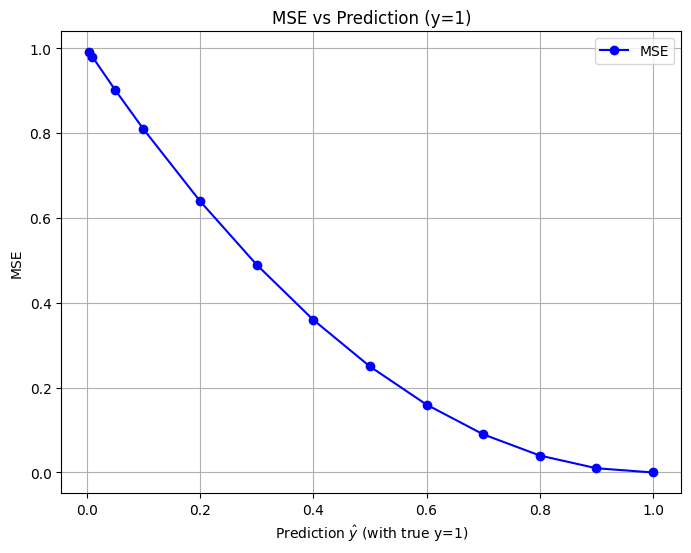

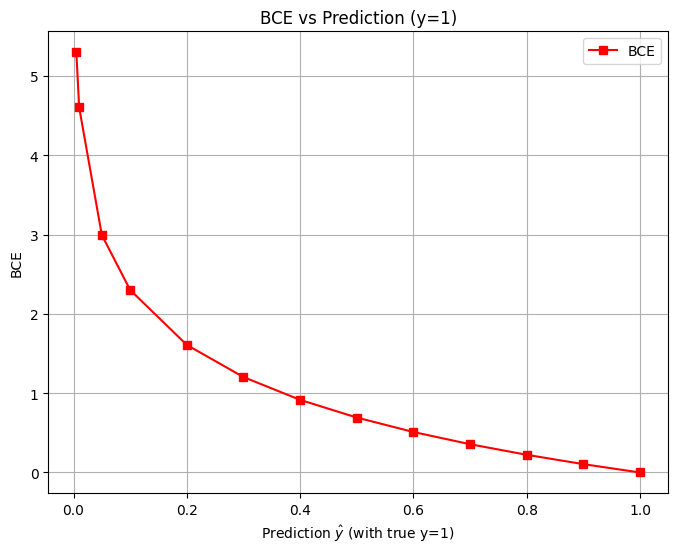

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Data setup
# -----------------------------
y_true = 1.0
yhat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                 0.6, 0.7, 0.8, 0.9, 1.0])

# -----------------------------
# Loss functions
# -----------------------------
def mse(y, y_pred):
    return (y - y_pred)**2   # Correct MSE (no 1/2 factor)

def bce(y, y_pred):
    eps = 1e-12  # to avoid log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

mse_vals = mse(y_true, yhat)
bce_vals = bce(y_true, yhat)

# -----------------------------
# Table of values
# -----------------------------
df = pd.DataFrame({
    "True y": [1]*len(yhat),
    "Prediction y_hat": yhat,
    "MSE": mse_vals,
    "BCE": bce_vals
}).round(6)

print(df)

# -----------------------------
# Plot 1: MSE vs Prediction
# -----------------------------
plt.figure(figsize=(8,6))
plt.plot(yhat, mse_vals, marker='o', color="blue", label="MSE")
plt.xlabel("Prediction $\\hat{y}$ (with true y=1)")
plt.ylabel("MSE")
plt.title("MSE vs Prediction (y=1)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot 2: BCE vs Prediction
# -----------------------------
plt.figure(figsize=(8,6))
plt.plot(yhat, bce_vals, marker='s', color="red", label="BCE")
plt.xlabel("Prediction $\\hat{y}$ (with true y=1)")
plt.ylabel("BCE")
plt.title("BCE vs Prediction (y=1)")
plt.grid(True)
plt.legend()
plt.show()


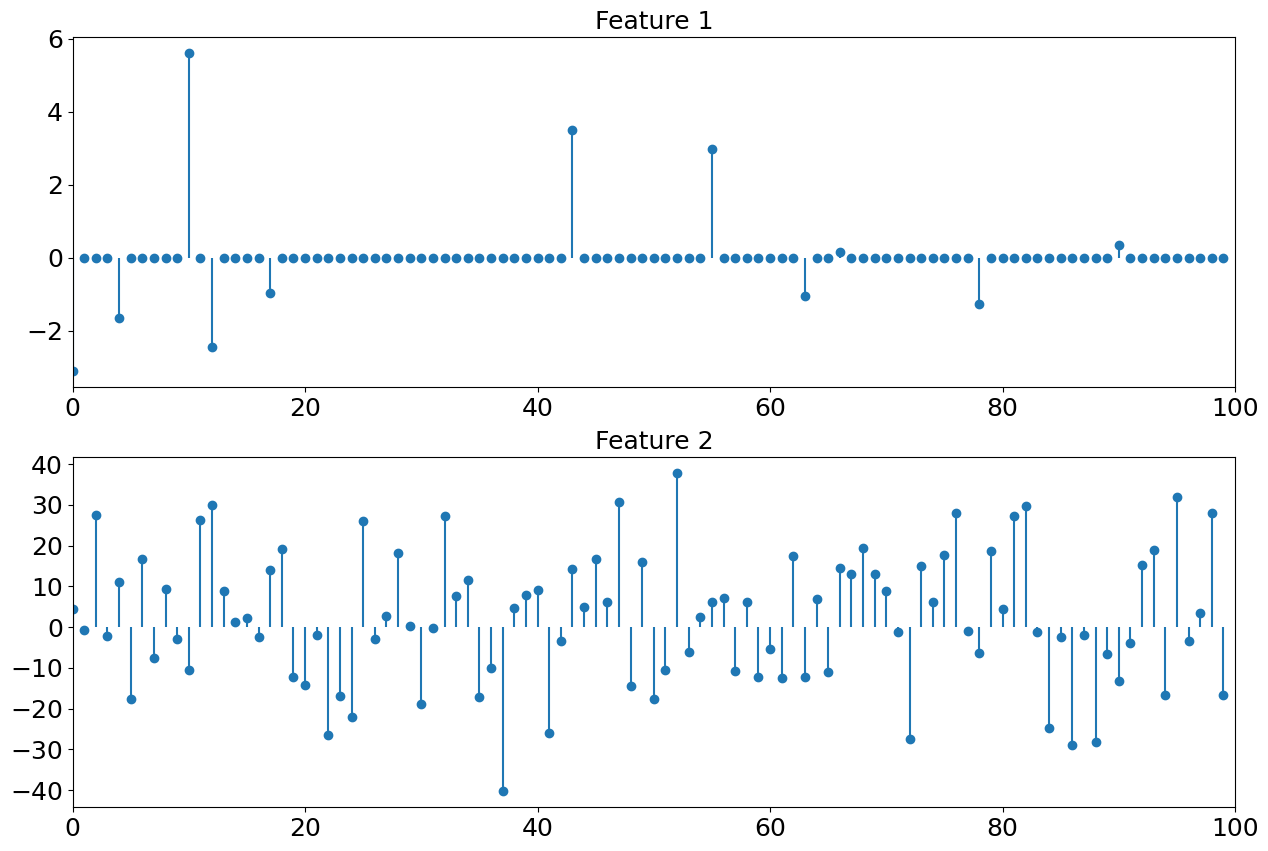

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# -----------------------------
# Parameters
# -----------------------------
signal_length = 100   # Total length of the signal
num_nonzero = 10      # Number of non-zero elements in the signal
your_index_no = 220569 # <-- Enter your index number without letters and leading zeros

# -----------------------------
# Feature 1: Sparse signal
# -----------------------------
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

# -----------------------------
# Feature 2: Gaussian noise
# -----------------------------
epsilon = np.random.normal(0, 15, signal_length)

# -----------------------------
# Plot the features
# -----------------------------
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)  # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal, basefmt=" ")

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon, basefmt=" ")
plt.xticks(fontsize=18)  # Adjust x-axis tick label font size
plt.yticks(fontsize=18)

plt.show()


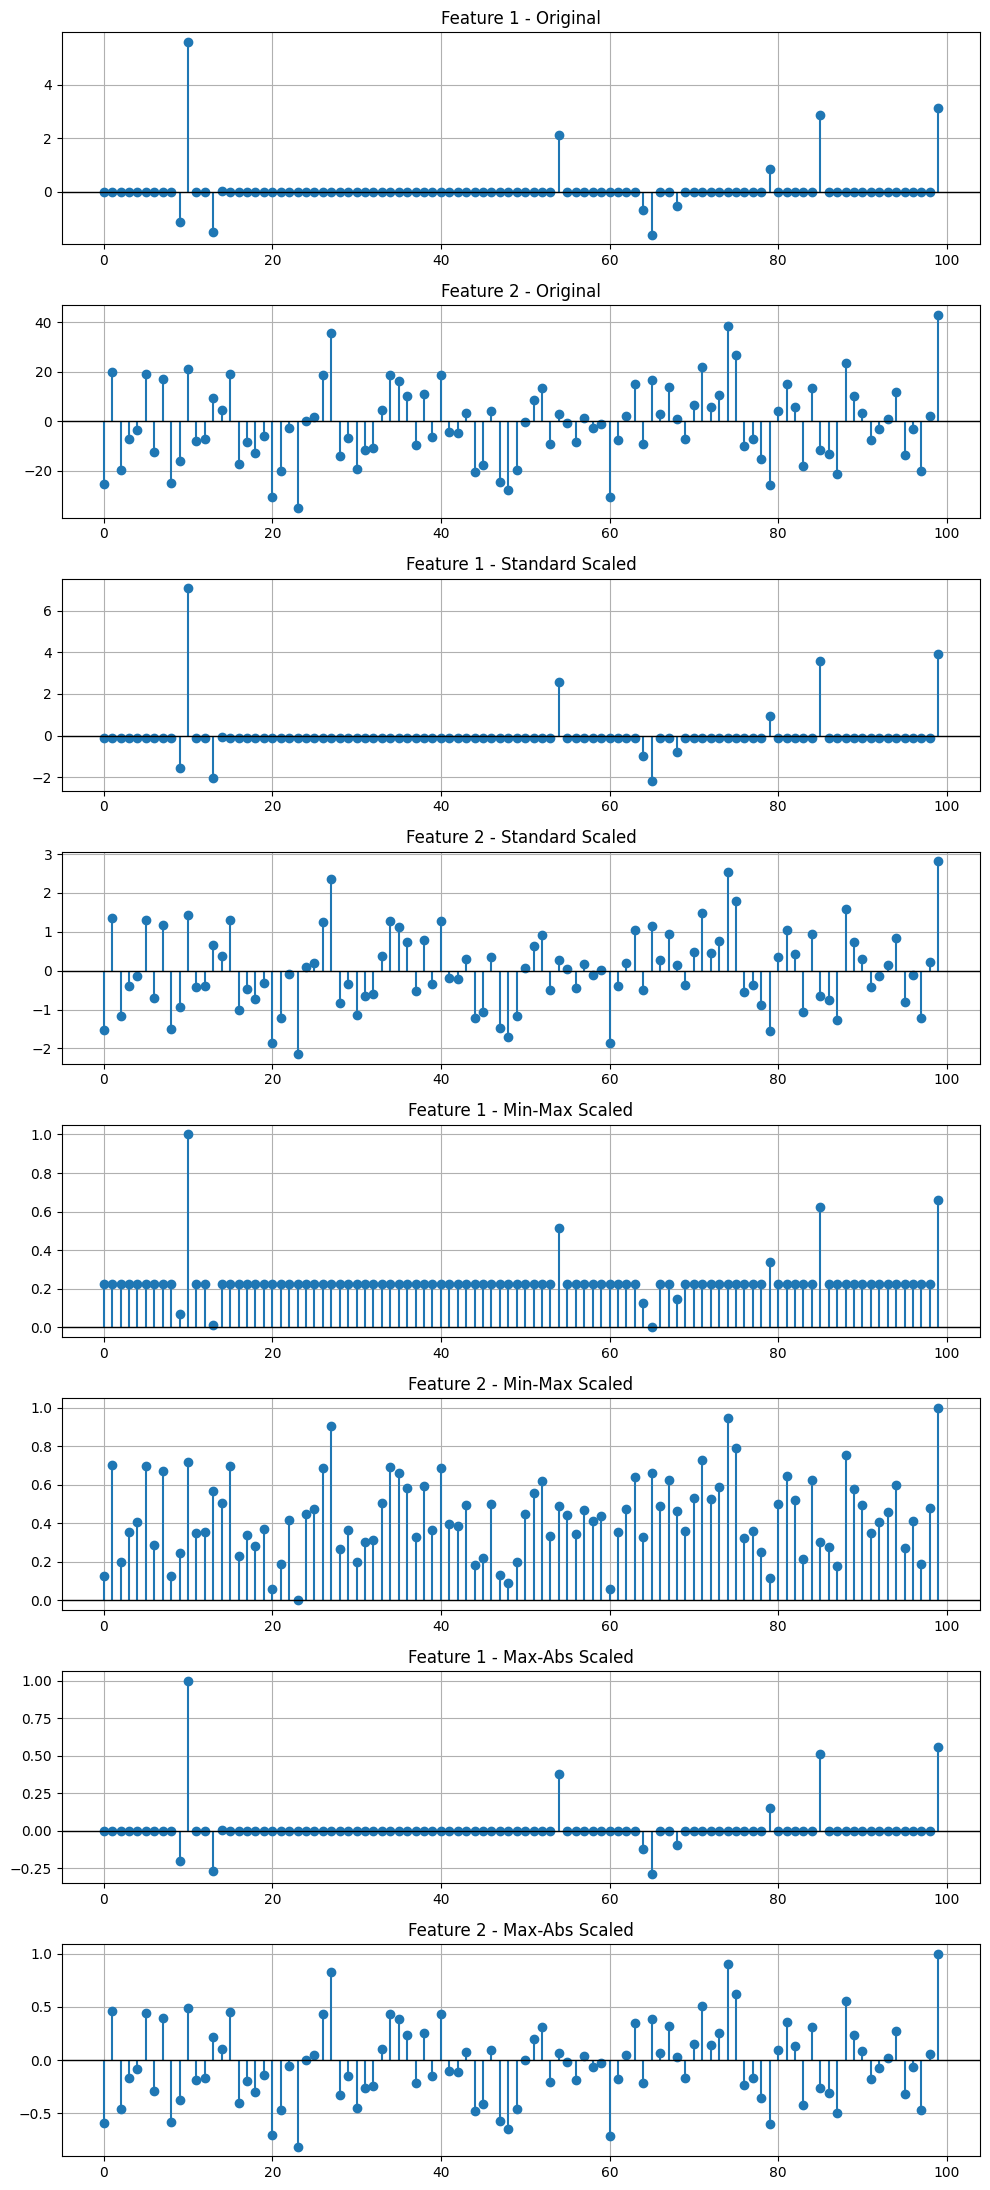

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


# Function to generate sparse signal

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100
num_nonzero = 10
your_index_no = 220569  # index without english letter


# Feature 1: Sparse signal

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5



# Feature 2: Gaussian noise

epsilon = np.random.normal(0, 15, signal_length)


# Scaling methods to apply

scalers = {
    "Original": lambda x: x,
    "Standard Scaled": lambda x: StandardScaler().fit_transform(x.reshape(-1,1)).flatten(),
    "Min-Max Scaled": lambda x: MinMaxScaler().fit_transform(x.reshape(-1,1)).flatten(),
    "Max-Abs Scaled": lambda x: MaxAbsScaler().fit_transform(x.reshape(-1,1)).flatten()
}


# Plot results

plt.figure(figsize=(10,22))

plot_idx = 1
for method, func in scalers.items():
    # Feature 1
    plt.subplot(8,1,plot_idx)
    plt.stem(func(sparse_signal), basefmt=" ")
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f"Feature 1 - {method}")
    plt.grid(True)
    plot_idx += 1

    # Feature 2
    plt.subplot(8,1,plot_idx)
    plt.stem(func(epsilon), basefmt=" ")
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f"Feature 2 - {method}")
    plt.grid(True)
    plot_idx += 1

plt.tight_layout()
plt.show()
